<a href="https://colab.research.google.com/github/smrutisanchita/CE888/blob/main/Lab_3/Bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import cross_val_score, ShuffleSplit, RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score


* We have loaded the necessary libraries above
* Now let's load the data

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")





df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [17]:
# convert a string variable to a categorical one
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Now let's prepare the data by cleaning it up and choosing the relevant column we would like to predict

In [19]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

In [22]:
df_dummies.drop(['duration'],inplace=True,axis=1)

In [ ]:
df_dummies.isna().sum() # checking if there is any null values

In [32]:
y = df_dummies['y']

X =df_dummies.drop(['y'],axis=1)

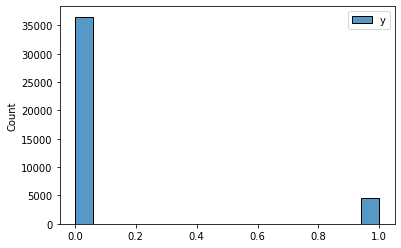

In [29]:
sns_plot = sns.histplot(y, kde=False)

#sns_plot.savefig("histogram_lpc.pdf", bbox_inches='tight')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=50)

In [68]:
#sorted(sklearn.metrics.SCORERS.keys())

In [67]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cross-validation
print("F1 Score is:" , (dummy_scores.mean()))

F1 Score is: 0.8017015696032554


In [65]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cross-validation
print("F1 Score is:" , (scores.mean()))

F1 Score is: 0.8671266414643288


In [71]:
clf = RandomForestClassifier(n_estimators=400, max_depth=6,random_state=60)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cross-validation
print("F1 Score is:" , (scores.mean()))

F1 Score is: 0.8712388352786838


In [72]:
clf = RandomForestClassifier(n_estimators=150, max_depth=6,random_state=60)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cross-validation
print("F1 Score is:" , (scores.mean()))


F1 Score is: 0.8707364602409342


In [75]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=6,random_state=60)
rfc.fit(X_train, y_train)
1- rfc.score(X_test, y_test)

0.10014566642388933

In [76]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=12,random_state=60)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [81]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
features = X.columns
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))


[ 7  8 61  2  4  0  6  5  3  1 59 52 49 50 43 60 42 55 31 38 36 56 23 54
 57 44 22 58 28 39  9 10 41 14 18 33 30 27 17 48 25 21 53 13 34 32 16 26
 15 19 51 45 47 40 12 37 11 20 46 24 29 35]
Feature ranking:
1. euribor3m (0.141528)
2. nr.employed (0.107920)
3. poutcome_success (0.078551)
4. pdays (0.068060)
5. emp.var.rate (0.063868)
6. age (0.061015)
7. cons.conf.idx (0.053484)
8. cons.price.idx (0.048456)
9. previous (0.027823)
10. campaign (0.026616)
11. poutcome_failure (0.016628)
12. month_oct (0.014022)
13. month_mar (0.013568)
14. month_may (0.013462)
15. contact_telephone (0.012798)
16. poutcome_nonexistent (0.012602)
17. contact_cellular (0.011891)
18. day_of_week_mon (0.010078)
19. education_university.degree (0.008907)
20. housing_yes (0.008391)
21. housing_no (0.008387)
22. day_of_week_thu (0.008112)
23. marital_single (0.007986)
24. day_of_week_fri (0.007749)
25. day_of_week_tue (0.007591)
26. month_apr (0.007246)
27. marital_married (0.007153)
28. day_of_week_wed (0.007103

In [80]:
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [78]:
X.shape[1]

62

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=60)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cross-validation
print("F1 Score is:" , (scores.mean()))

In [50]:
rfc_grid = {'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=50)],
              'max_depth': range(3,10),'min_samples_leaf' : range(1,5,1) }
rfc_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=50), param_grid=rfc_grid, cv=10, verbose=1,n_jobs=-1)
rfc_gs.fit(X_train, y_train)


Fitting 10 folds for each of 1400 candidates, totalling 14000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.6min


KeyboardInterrupt: ignored

In [ ]:
print('Train Accuracy for KNN: ', rfc_gs.score(x_train_scaled, Y_train))
print('Best Parameters:',knn_gs.best_estimator_)

Now let's train the classifier on the whole dataset

[3 1 2 0 5 4 6]
Feature ranking:
1. Post Month (0.266417)
2. Page total likes (0.234008)
3. Type (0.209396)
4. Category (0.083565)
5. Post Weekday (0.072930)
6. Post Hour (0.070329)
7. Paid (0.063356)


(0.0, 0.4419226296948641)

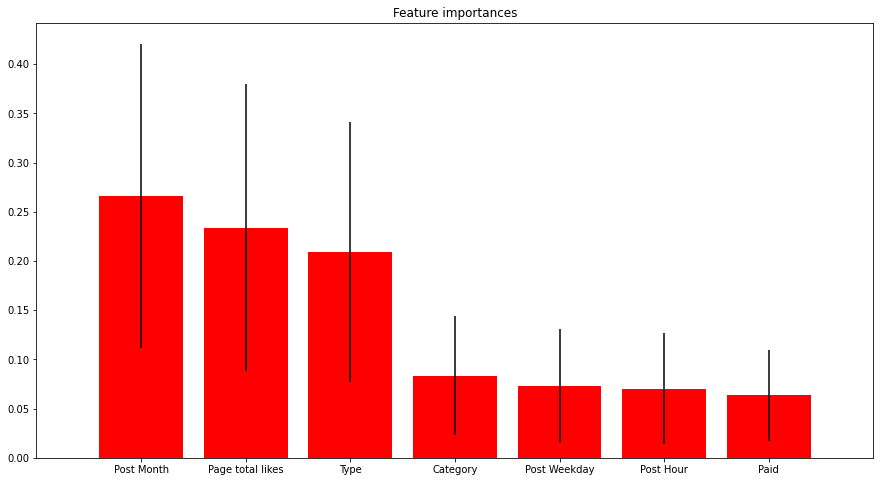

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

In [ ]:
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Normalized confusion matrix


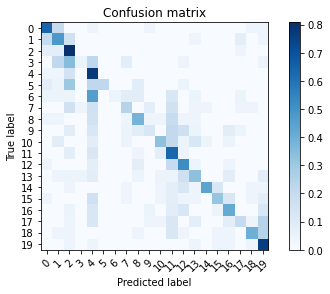

In [ ]:
# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize=True,
                      title='Confusion matrix')

#plt.savefig("confusion.pdf", bbox_inches='tight')